In [1]:
using PyPlot
include("model.jl")
include("lines_and_grid.jl")
;

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/aw/.julia/packages/PyPlot/4wzW1/src/init.jl:192


In [2]:
M = model_matrix(wl_grid[line_mask], li_vac, li_vac/3600)
M[3:end, :] ./= 5
M = M[[1, 2, 5], :]

3×9 Array{Float64,2}:
 0.000809522  0.00913075  0.0518972  …  0.0564694  0.0103433  0.000950968
 0.111111     0.111111    0.111111      0.111111   0.111111   0.111111   
 0.0          0.0         0.2           0.0        0.0        0.0        

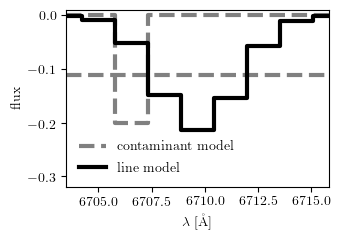

In [4]:
figure(figsize=(3.5, 2.5))
step(wl_grid[line_mask], -M[2, :], c="grey", lw=3, ls="--", label="contaminant model", where="mid")
step(wl_grid[line_mask], -M[3, :], c="grey", lw=3, ls="--", where="mid")
step(wl_grid[line_mask], -M[1, :], c="k", lw=3, label="line model", where="mid")
legend()
ylim(-.32, 0.01)
xlim(wl_grid[line_mask][[1, end]]...)
xlabel(L"$\lambda$ [\AA]")
ylabel("flux")
tight_layout()
savefig("../../Desktop/contaminant_models.pdf", bbox_inches="tight")